In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [84]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [2]:
df1=pd.read_csv("ipl_2022_deliveries.csv")

In [30]:
df1.head()

,match_id,season,match_no,date,venue,batting_team,bowling_team,innings,over,striker,bowler,runs_of_bat,extras,wide,legbyes,byes,noballs,wicket_type,player_dismissed,fielder
0,202201,2022,1,"Mar 26, 2022","Wankhede Stadium, Mumbai",CSK,KKR,1,0.1,Gaikwad,Umesh Yadav,0,1,0,0,0,1,NaN,NaN,NaN
1,202201,2022,1,"Mar 26, 2022","Wankhede Stadium, Mumbai",CSK,KKR,1,0.1,Gaikwad,Umesh Yadav,0,0,0,0,0,0,NaN,NaN,NaN
2,202201,2022,1,"Mar 26, 2022","Wankhede Stadium, Mumbai",CSK,KKR,1,0.2,Gaikwad,Umesh Yadav,0,1,1,0,0,0,NaN,NaN,NaN
3,202201,2022,1,"Mar 26, 2022","Wankhede Stadium, Mumbai",CSK,KKR,1,0.2,Gaikwad,Umesh Yadav,0,0,0,0,0,0,NaN,NaN,NaN
4,202201,2022,1,"Mar 26, 2022","Wankhede Stadium, Mumbai",CSK,KKR,1,0.3,Gaikwad,Umesh Yadav,0,0,0,0,0,0,caught,Gaikwad,Nitish Rana


In [5]:
df1['venue'].unique()

array(['Wankhede Stadium, Mumbai', 'Brabourne Stadium, Mumbai',
       'Dr DY Patil Sports Academy, Mumbai',
       'Maharashtra Cricket Association Stadium, Pune',
       'Eden Gardens, Kolkata', 'Narendra Modi Stadium, Ahmedabad'],
      dtype=object)

In [9]:
df1['match_no'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74], dtype=int64)

In [20]:
df_striker_runs=df1.groupby('striker')['runs_of_bat'].sum().sort_values(ascending=False).reset_index()

In [21]:
df_striker_runs.head()

,striker,runs_of_bat
0,Buttler,863
1,Rahul,616
2,de Kock,508
3,Hardik Pandya,487
4,Shubman Gill,483


In [43]:
df_runs_teams=df1.groupby(['batting_team'])['runs_of_bat'].sum().reset_index()
df_runs_teams.head(20)

,batting_team,runs_of_bat
0,CSK,2164
1,DC,2218
2,GT,2517
3,KKR,2109
4,LSG,2405
5,MI,2100
6,PBKS,2193
7,RCB,2454
8,RR,2807
9,SRH,2084


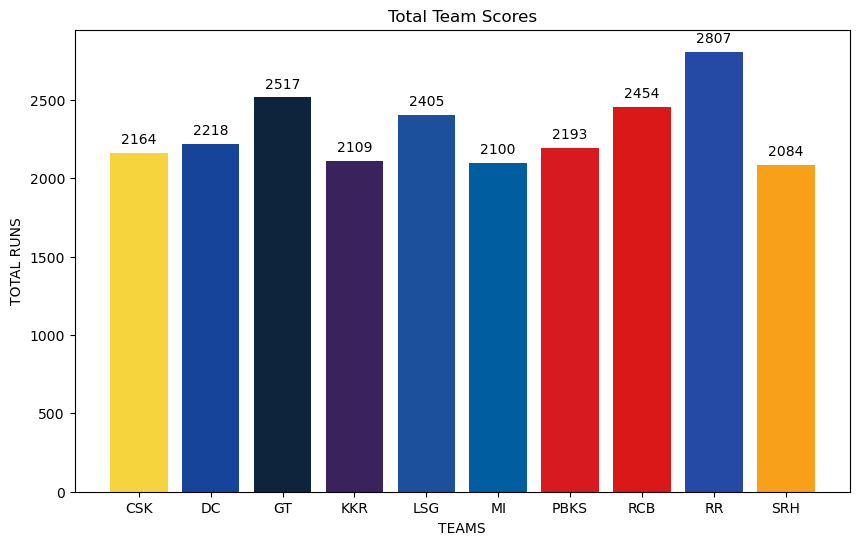

In [70]:
teams= df_runs_teams['batting_team'].values
runs=df_runs_teams['runs_of_bat'].values
plt.figure(figsize=(10, 6))
c=['#F5D43D','#17449B','#0D243C','#3A225D','#1C4F9C','#005DA0','#D71920','#DA1818','#254AA5','#F9A01B']
plt.xlabel("TEAMS")
plt.ylabel("TOTAL RUNS")
plt.title("Total Team Scores")
bars=plt.bar(teams,runs,color=c)
for bar, run in zip(bars,runs):
    plt.text(
        bar.get_x()+bar.get_width()/2,
        bar.get_height() +40,
        f'{int(run)}',
        ha='center',
        va='bottom'
    )
plt.show()

In [79]:
total_sixes=df1[df1['runs_of_bat']==6].shape[0]
total_sixes

1062

In [81]:
total_fours=df1[df1['runs_of_bat']==4].shape[0]
total_fours

2020

In [113]:
Extras_df = df1.groupby(['match_no', 'innings', 'bowling_team'])[['extras', 'wide', 'legbyes', 'byes', 'noballs']].sum().reset_index()

Extras_df

,match_no,innings,bowling_team,extras,wide,legbyes,byes,noballs
0,1,1,KKR,6,3,0,0,2
1,1,2,CSK,4,0,0,1,0
2,2,1,DC,3,2,1,0,0
3,2,2,MI,11,7,1,0,0
4,3,1,PBKS,23,7,3,2,0
5,3,2,RCB,22,12,1,0,0
6,4,1,GT,4,4,0,0,0
7,4,2,LSG,9,3,3,0,0
8,5,1,SRH,14,6,4,0,4
9,5,2,RR,10,4,2,0,1


In [117]:
Discipline_df=Extras_df.groupby('bowling_team')['extras'].sum().reset_index()
Wide_df=Extras_df.groupby('bowling_team')['wide'].sum().reset_index()
Legbyes_df=Extras_df.groupby('bowling_team')['legbyes'].sum().reset_index()
Byes_df=Extras_df.groupby('bowling_team')['byes'].sum().reset_index()
Noballs_df=Extras_df.groupby('bowling_team')['noballs'].sum().reset_index()

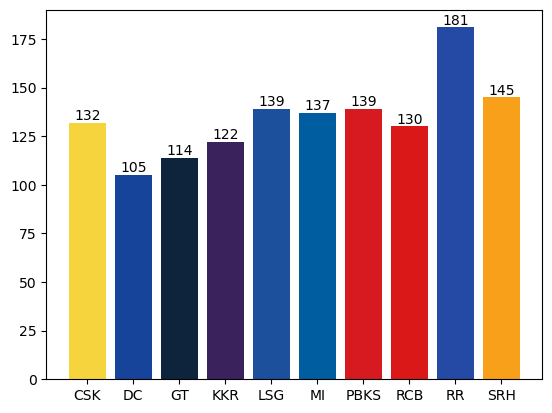

In [116]:
extras=Discipline_df['extras'].values
c=['#F5D43D','#17449B','#0D243C','#3A225D','#1C4F9C','#005DA0','#D71920','#DA1818','#254AA5','#F9A01B']
bars=plt.bar(teams,extras,color=c)

for bar,extra in zip(bars,extras):
    plt.text(
    bar.get_x()+bar.get_width()/2,
    bar.get_height(),
    f'{(extra)}',
    ha='center',
    va='bottom'
    )
plt.show()

In [123]:
df1.head()

,match_id,season,match_no,date,venue,batting_team,bowling_team,innings,over,striker,bowler,runs_of_bat,extras,wide,legbyes,byes,noballs,wicket_type,player_dismissed,fielder
0,202201,2022,1,"Mar 26, 2022","Wankhede Stadium, Mumbai",CSK,KKR,1,0.1,Gaikwad,Umesh Yadav,0,1,0,0,0,1,NaN,NaN,NaN
1,202201,2022,1,"Mar 26, 2022","Wankhede Stadium, Mumbai",CSK,KKR,1,0.1,Gaikwad,Umesh Yadav,0,0,0,0,0,0,NaN,NaN,NaN
2,202201,2022,1,"Mar 26, 2022","Wankhede Stadium, Mumbai",CSK,KKR,1,0.2,Gaikwad,Umesh Yadav,0,1,1,0,0,0,NaN,NaN,NaN
3,202201,2022,1,"Mar 26, 2022","Wankhede Stadium, Mumbai",CSK,KKR,1,0.2,Gaikwad,Umesh Yadav,0,0,0,0,0,0,NaN,NaN,NaN
4,202201,2022,1,"Mar 26, 2022","Wankhede Stadium, Mumbai",CSK,KKR,1,0.3,Gaikwad,Umesh Yadav,0,0,0,0,0,0,caught,Gaikwad,Nitish Rana


In [128]:
df1['wicket_type'].fillna(0,inplace=True)
df1.head()

,match_id,season,match_no,date,venue,batting_team,bowling_team,innings,over,striker,bowler,runs_of_bat,extras,wide,legbyes,byes,noballs,wicket_type,player_dismissed,fielder
0,202201,2022,1,"Mar 26, 2022","Wankhede Stadium, Mumbai",CSK,KKR,1,0.1,Gaikwad,Umesh Yadav,0,1,0,0,0,1,0,NaN,NaN
1,202201,2022,1,"Mar 26, 2022","Wankhede Stadium, Mumbai",CSK,KKR,1,0.1,Gaikwad,Umesh Yadav,0,0,0,0,0,0,0,NaN,NaN
2,202201,2022,1,"Mar 26, 2022","Wankhede Stadium, Mumbai",CSK,KKR,1,0.2,Gaikwad,Umesh Yadav,0,1,1,0,0,0,0,NaN,NaN
3,202201,2022,1,"Mar 26, 2022","Wankhede Stadium, Mumbai",CSK,KKR,1,0.2,Gaikwad,Umesh Yadav,0,0,0,0,0,0,0,NaN,NaN
4,202201,2022,1,"Mar 26, 2022","Wankhede Stadium, Mumbai",CSK,KKR,1,0.3,Gaikwad,Umesh Yadav,0,0,0,0,0,0,caught,Gaikwad,Nitish Rana


In [127]:
df1['wicket_type'].describe()

count     17912
unique        8
top           0
freq      17001
Name: wicket_type, dtype: int64

In [131]:
wickets=df1['wicket_type']
count=0
for wicket in wickets:
    if wicket!=0:
        count=count+1

print(count)

911


In [134]:
wickets_df=df1[df1['wicket_type']!=0]

In [135]:
wickets_df.head()

,match_id,season,match_no,date,venue,batting_team,bowling_team,innings,over,striker,bowler,runs_of_bat,extras,wide,legbyes,byes,noballs,wicket_type,player_dismissed,fielder
4,202201,2022,1,"Mar 26, 2022","Wankhede Stadium, Mumbai",CSK,KKR,1,0.3,Gaikwad,Umesh Yadav,0,0,0,0,0,0,caught,Gaikwad,Nitish Rana
27,202201,2022,1,"Mar 26, 2022","Wankhede Stadium, Mumbai",CSK,KKR,1,4.1,Conway,Umesh Yadav,0,0,0,0,0,0,caught,Conway,Shreyas Iyer
50,202201,2022,1,"Mar 26, 2022","Wankhede Stadium, Mumbai",CSK,KKR,1,7.6,Uthappa,Chakaravarthy,0,1,0,0,0,0,stumped,Uthappa,Jackson
55,202201,2022,1,"Mar 26, 2022","Wankhede Stadium, Mumbai",CSK,KKR,1,8.4,Jadeja,Narine,0,0,0,0,0,0,runout,Rayudu,Shreyas Iyer/Narine
68,202201,2022,1,"Mar 26, 2022","Wankhede Stadium, Mumbai",CSK,KKR,1,10.5,Shivam Dube,Russell,0,0,0,0,0,0,caught,Shivam Dube,Narine


In [152]:
wickets_df['wicket_type'].unique()

array(['caught', 'stumped', 'runout', 'bowled', 'lbw', 'retired out',
       'hit wicket'], dtype=object)

In [154]:
dummies=pd.get_dummies(wickets_df.wicket_type).astype(int)
print("Total Number of Bowled: ",dummies.bowled.sum())
print("Total Number of caught: ",dummies.caught.sum())
print("Total Number of hit wicket: ",dummies['hit wicket'].sum())
print("Total Number of lbw: ",dummies.lbw.sum())
print("Total Number of retired out: ",dummies['retired out'].sum())
print("Total Number of runout: ",dummies.runout.sum())
print("Total Number of stumped: ",dummies.stumped.sum())

Total Number of Bowled:  123
Total Number of caught:  650
Total Number of hit wicket:  1
Total Number of lbw:  57
Total Number of retired out:  1
Total Number of runout:  61
Total Number of stumped:  18


In [165]:
bowler_df=wickets_df[['bowler','extras','noballs','wicket_type','wide']]
bowler_df.head()

,bowler,extras,noballs,wicket_type,wide
4,Umesh Yadav,0,0,caught,0
27,Umesh Yadav,0,0,caught,0
50,Chakaravarthy,1,0,stumped,0
55,Narine,0,0,runout,0
68,Russell,0,0,caught,0


In [169]:
bowler_df['bowler'].nunique()

104

In [218]:
wickets_per_bowler = bowler_df.groupby('bowler').size().sort_values(ascending=False)
wickets_per_bowler_df = wickets_per_bowler.reset_index(name='wickets')
wickets_per_bowler_df.index+=1
wickets_per_bowler_df[:10]

,bowler,wickets
1,Chahal,29
2,Hasaranga,27
3,Umran Malik,23
4,Rabada,23
5,Harshal Patel,21
6,Prasidh,21
7,Kuldeep Yadav,21
8,Hazlewood,21
9,Russell,21
10,Shami,21


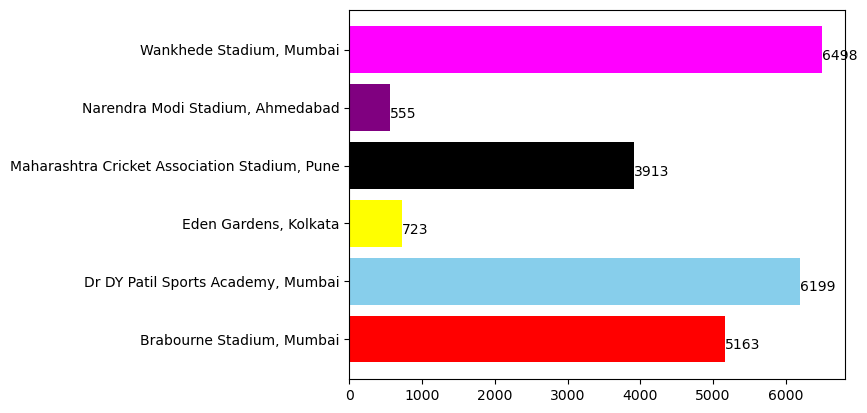

In [278]:
Venue_df=df1.groupby('venue')['runs_of_bat'].sum().reset_index()
Venue_df.index+=1
venue=Venue_df['venue'].values
runs=Venue_df['runs_of_bat'].values
c=['Red','Skyblue','Yellow','Black','Purple','Magenta']
bars=plt.barh(venue,runs,color=c)

for bar,run in zip(bars,runs):
    plt.text(
        bar.get_width(),
        bar.get_y()+bar.get_height()-0.5,
        f'{(run)}',
        va='center'
        )


plt.show()

In [188]:
runs_per_match_df=df1.groupby(['match_no','innings'])['runs_of_bat'].sum().reset_index()
runs_per_match_df.head()

,match_no,innings,runs_of_bat
0,1,1,125
1,1,2,129
2,2,1,174
3,2,2,168
4,3,1,182


In [200]:
runs_per_player_per_match_df=df1.groupby(['match_no','batting_team','innings','striker'])['runs_of_bat'].sum().reset_index()
runs_per_player_per_match_df.index +=1
runs_per_player_per_match_df.head()

,match_no,batting_team,innings,striker,runs_of_bat
1,1,CSK,1,Conway,3
2,1,CSK,1,Dhoni,50
3,1,CSK,1,Gaikwad,0
4,1,CSK,1,Jadeja,26
5,1,CSK,1,Rayudu,15


In [217]:
top_bowlers = df1.loc[~df1['wicket_type'].isin(['runout', 'retired out', 'retired hurt','Na'])& df1['wicket_type'].notna()].groupby('bowler').agg(
    M=('match_no', lambda x: len(x.unique())),
    Eco=('runs_of_bat', lambda x: (x.mean() * 6).round(2))
).sort_values(by=['Eco'], ascending=[True]).reset_index()

top_bowlers.index += 1
top_bowlers[:10]                             

,bowler,M,Eco
1,Matheesha Pathirana,2,5.12
2,Narine,14,5.37
3,Mohsin Khan,9,5.39
4,Ayush Badoni,2,5.50
5,Solanki,2,6.33
6,Moeen Ali,10,6.37
7,Rashid Khan,16,6.44
8,Tilak Varma,2,6.50
9,Bhuvneshwar,14,6.53
10,Willey,4,6.55


In [225]:
df1['total_runs']=df1['runs_of_bat']+df1['extras']

In [226]:
df1.head()

,match_id,season,match_no,date,venue,batting_team,bowling_team,innings,over,striker,bowler,runs_of_bat,extras,wide,legbyes,byes,noballs,wicket_type,player_dismissed,fielder,total_runs
0,202201,2022,1,"Mar 26, 2022","Wankhede Stadium, Mumbai",CSK,KKR,1,0.1,Gaikwad,Umesh Yadav,0,1,0,0,0,1,0,NaN,NaN,1
1,202201,2022,1,"Mar 26, 2022","Wankhede Stadium, Mumbai",CSK,KKR,1,0.1,Gaikwad,Umesh Yadav,0,0,0,0,0,0,0,NaN,NaN,0
2,202201,2022,1,"Mar 26, 2022","Wankhede Stadium, Mumbai",CSK,KKR,1,0.2,Gaikwad,Umesh Yadav,0,1,1,0,0,0,0,NaN,NaN,1
3,202201,2022,1,"Mar 26, 2022","Wankhede Stadium, Mumbai",CSK,KKR,1,0.2,Gaikwad,Umesh Yadav,0,0,0,0,0,0,0,NaN,NaN,0
4,202201,2022,1,"Mar 26, 2022","Wankhede Stadium, Mumbai",CSK,KKR,1,0.3,Gaikwad,Umesh Yadav,0,0,0,0,0,0,caught,Gaikwad,Nitish Rana,0


In [255]:
average_runs_df=(df1.groupby('batting_team')['total_runs'].mean()*74).round(1).sort_values(ascending=True).reset_index()
average_runs_df.index+=1
avgrun=average_runs_df['total_runs'].values

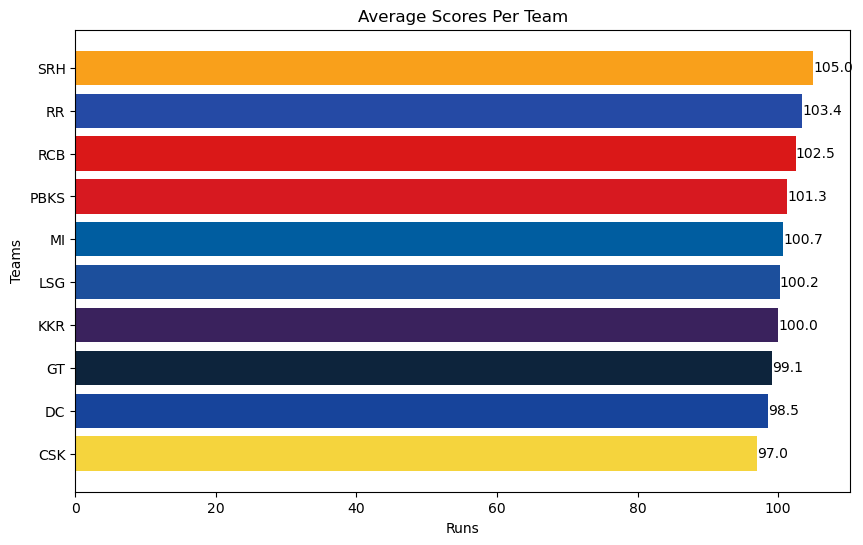

In [256]:
plt.figure(figsize=(10,6))
bars=plt.barh(teams,avgrun,color=c)

for bar,run in zip(bars,avgrun):
    plt.text(
        bar.get_width(),
        bar.get_y()+bar.get_height()/2,
        f'{(run)}',
        va='center'
      )

plt.title("Average Scores Per Team")
plt.xlabel("Runs")
plt.ylabel("Teams")
        
plt.show()

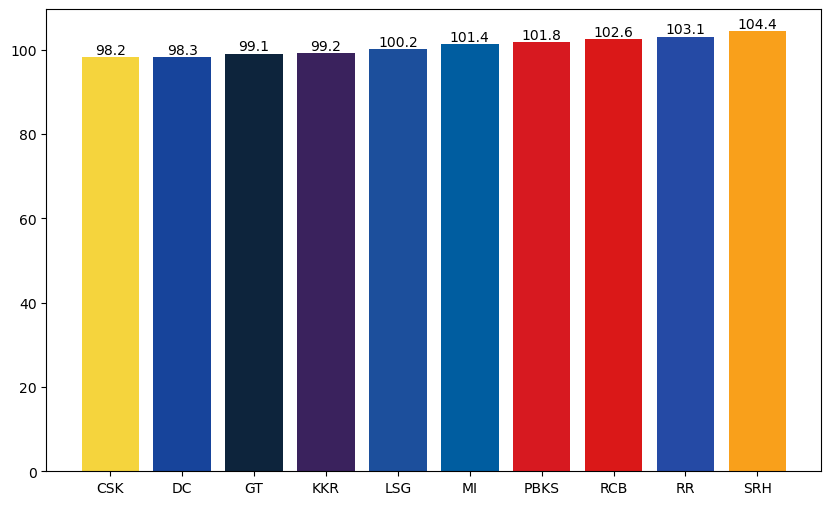

In [266]:
Average_runs_conc=(df1.groupby('bowling_team')['total_runs'].mean()*74).round(1).sort_values(ascending=True).reset_index()
Average_runs_conc.index+=1
ballruns=Average_runs_conc['total_runs'].values

plt.figure(figsize=(10,6))

bars=plt.bar(teams,ballruns,color=c)

for bar,run in zip(bars,ballruns):
    plt.text(
     bar.get_x()+bar.get_width()/2,
    bar.get_height(),
    f'{(run)}',
    ha='center',
    va='bottom'
    )

plt.show()
    
